In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
os.chdir("..")
from model import run_experiments

df = run_experiments(["Base"])

2023-12-07 11:33:35.584024


In [11]:
df['relay_log']

0                                                   None
1      {(<model.classes.service.Service object at 0x7...
2      {(<model.classes.service.Service object at 0x7...
3      {(<model.classes.service.Service object at 0x7...
4      {(<model.classes.service.Service object at 0x7...
                             ...                        
361    {(<model.classes.service.Service object at 0x7...
362    {(<model.classes.service.Service object at 0x7...
363    {(<model.classes.service.Service object at 0x7...
364    {(<model.classes.service.Service object at 0x7...
365    {(<model.classes.service.Service object at 0x7...
Name: relay_log, Length: 366, dtype: object

## Extra KPIs

In [3]:
df['n_servicers'] = df['Servicers'].apply(len)
df['n_applications'] = df['Applications'].apply(len)
df['n_gateways'] = df['Gateways'].apply(len)
df['n_services'] = df['Services'].apply(len)

df['n_understaked_servicers'] = df['understaked_servicers'].apply(len)
df['n_understaked_gateways'] = df['understaked_gateways'].apply(len)
df['n_understaked_applications'] = df['understaked_applications'].apply(len)


## Simulation KPIs

In [4]:
simulation_kpis = []

simulation_kpis.append(df.groupby('key')['POKT_net_mint'].sum() / df.groupby('key')['floating_supply'].first())
simulation_kpis.append(df.groupby('key')['kpi_c'].mean())

simulation_kpis = pd.concat(simulation_kpis, axis=1)
simulation_kpis.columns = ["Net Minting Rate", "KPI C"]
print(simulation_kpis)

       Net Minting Rate     KPI C
key                              
0-0-1               0.0  0.090689


## Basic Line Graphs

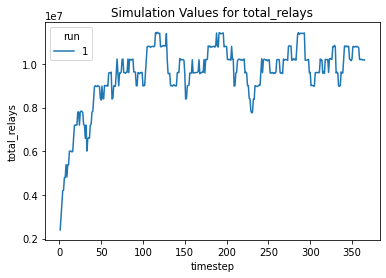

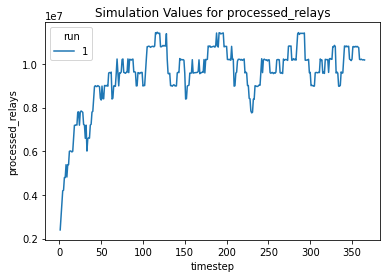

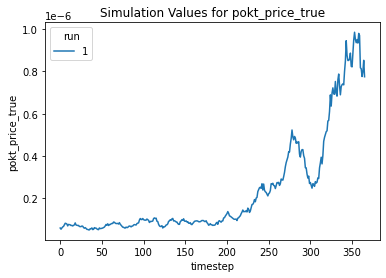

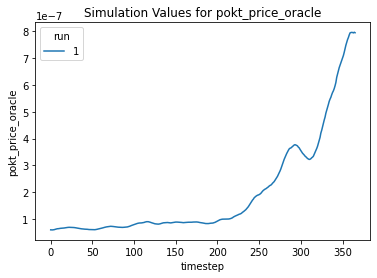

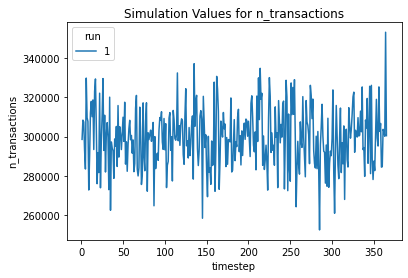

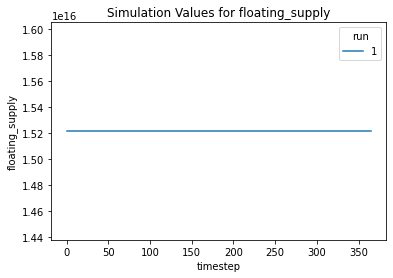

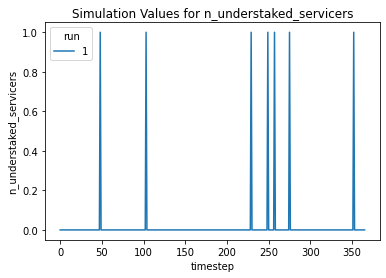

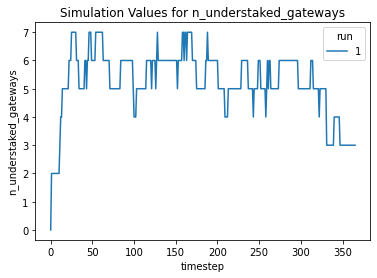

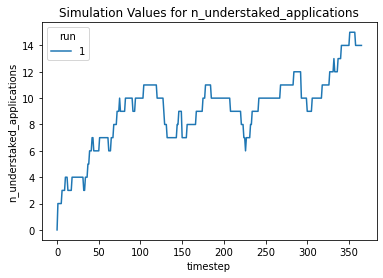

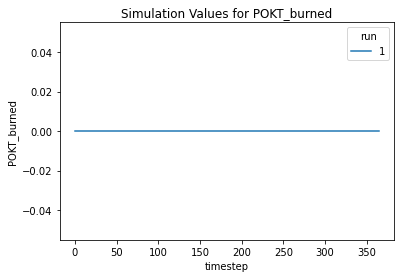

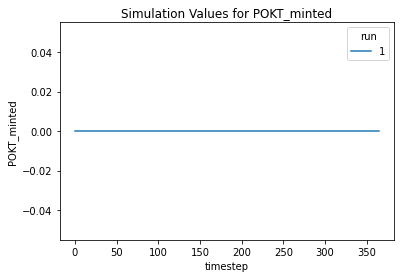

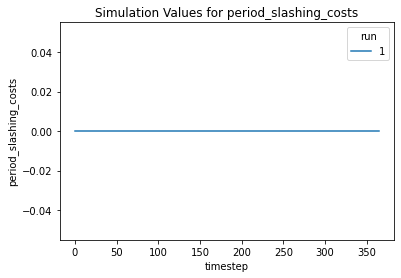

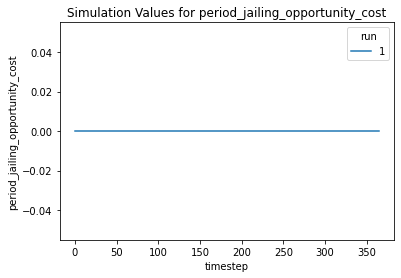

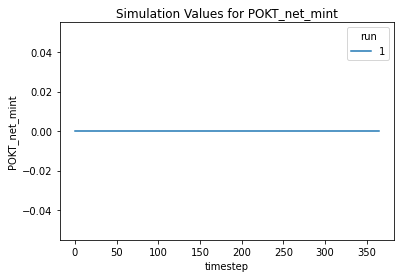

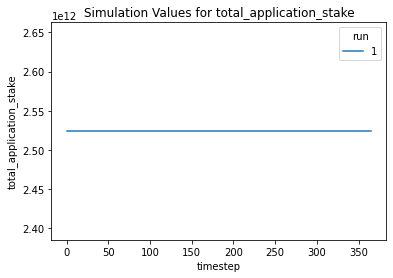

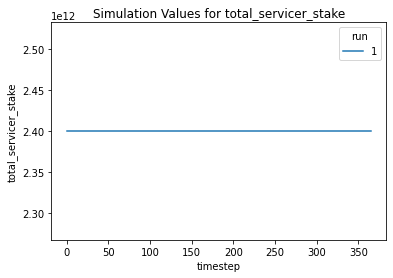

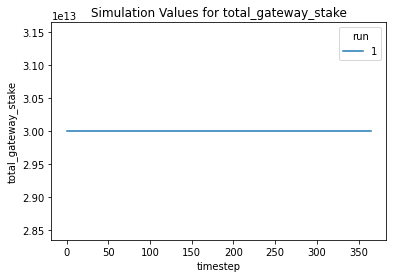

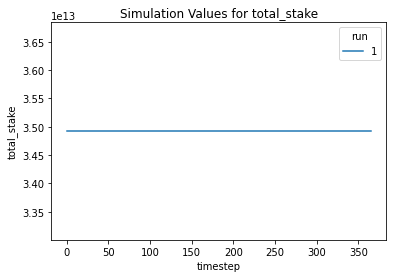

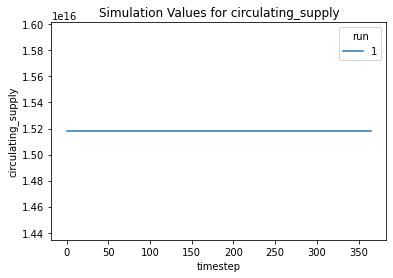

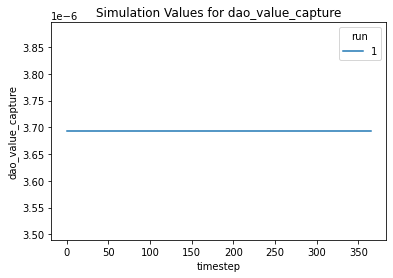

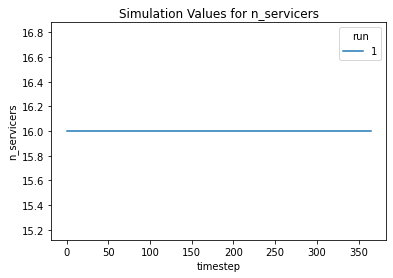

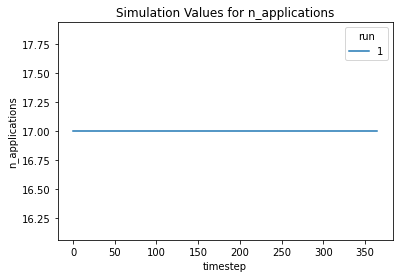

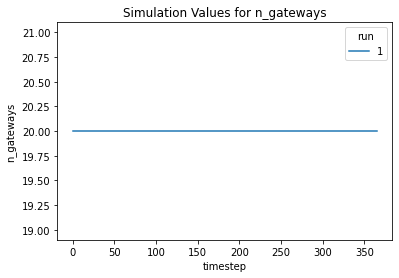

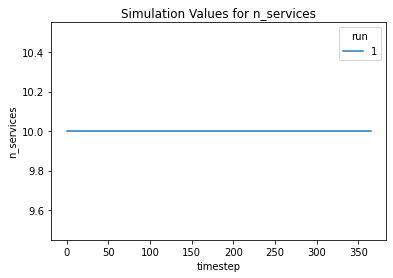

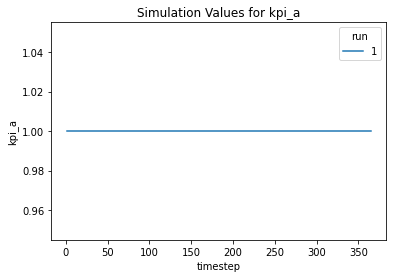

In [5]:
for col in ['total_relays', 'processed_relays', 'pokt_price_true', 'pokt_price_oracle',
           'n_transactions', 'floating_supply', 'n_understaked_servicers', 'n_understaked_gateways',
            'n_understaked_applications', 'POKT_burned', 'POKT_minted','period_slashing_costs',
            'period_jailing_opportunity_cost','POKT_net_mint', 'total_application_stake',
            'total_servicer_stake', 'total_gateway_stake', 'total_stake', 'circulating_supply',
            'dao_value_capture', 'n_servicers', 'n_applications', 'n_gateways',
           'n_services', 'kpi_a']:
    # Grab the pivot table
    table = df.pivot("timestep", "run", col)
    
    # Plot
    table.plot(kind = 'line')
    plt.xlabel("timestep")
    plt.ylabel(col)
    plt.title("Simulation Values for {}".format(col))
    
    plt.show()